# TP 2 Descente du Gradient
Dans ce TP, nous aimerions prédire le bénéfice d'une entreprise dans plusieurs ville en nous basant sur les habitant de cette ville.

Pour ce faire, nous étudierons un ensemble de données avec le bénéfice (y) et les caractéristiques des habitants (X).

La prédiction se fera avec l'agorithme de descente du gradient.

# Importation des librairies necessaires au travail

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Lecture des fichiers de données
Pour ce TP, nous allons lire les données à partir d'un fichier csv.

In [ ]:
# # données
# data = np.genfromtxt('/content/drive/MyDrive/Cours Apprentissage Automatique et Réseaux de Neurones/TP2/data.csv', delimiter=',', dtype=float)
# data.shape

In [ ]:
# données
data = np.genfromtxt('/content/drive/MyDrive/AI/TP2/data.csv', delimiter=',', dtype=float)
data.shape

(97, 2)

Dans ces données (data), la première colonne represente la première caractéristique (la population d'une ville x1000), la deuxieme colonne represente le bénéfice (x1000).

Chaque ligne represente un exemple de notre ensemble de données. 

Mettons ces données dans leus vecteurs correspondants.

In [ ]:
# rajoutons l'ordonnée à l'origine theta 0
intercept = np.ones((data.shape[0],1))
X=np.column_stack((intercept,data[:,0]))
y = data[:, 1]

Text(0, 0.5, 'Bénéfice x1000')

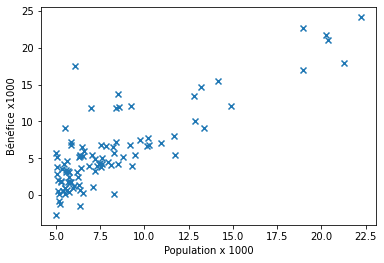

In [ ]:
# traçons ces données pour visualisation
plt.scatter(X[:,1],y,marker ='x')
plt.xlabel('Population x 1000')
plt.ylabel('Bénéfice x1000')

# Descente du Gradient : Préparation des fonctions

1- Calcul du coût

Cette fonction servira à calculer le cout $J(\theta_0,\theta_1)$

Elle prendra l'ensemble de données d'apprentissage en entrée ainsi que les paramètres définis initialement

In [ ]:
def computeCostNonVect(X, y, theta):
    # idéalement, tracer le coût à chaque itération pour s'assurer que la descente du gradient est correcte
     theta0 = theta[0][0]
     theta1 = theta[1][0]
     sum = 0
     for i in range(len(y)): 
       H = theta0 + theta1 * X[i][1]   
       sum = sum + (H - y[i])**2
     return  (sum/(2*len(y)))

In [ ]:
#calcule du temps (moyen) d'execution de la fonction 1 (non vec) 
theta = np.zeros((2, 1))
import time 
sum = 0
for i in range(10000):
    tic = time.time()
    computeCostNonVect(X, y, theta)
    toc = time.time()
    sum =sum + (toc - tic)
print("Time Elapsed: ",sum)

Time Elapsed:  0.8409585952758789


Coût avec  vectorisation

In [ ]:
def computeCost(X, y, theta):
    theta0 = theta[0][0]
    theta1 = theta[1][0]
    H = theta0 + theta1 * X[:,1] 
    res = (H - y)**2  
    return (np.sum(res)/(2*len(y))) 

In [ ]:
#calcule du temps (moyen) d'execution de la fonction 2 (avec vectorisation) 
sum = 0
for i in range(10000):
    tic = time.time()
    computeCost(X, y, theta)
    toc = time.time()
    sum =sum + (toc - tic)
print("Time Elapsed: ",sum)

Time Elapsed:  0.13672780990600586


on remarque que la methode avec vectorisation est plus rapide que celle sans (boucle) (voir les temps d'executions).

2- Fonction de la descente du gradient

Cette fonction mettra à jour les paramètres $\theta_0,\theta_1$ jusqu'à convergence: atteinte du nombre d'itérations max, ou dérivée assez petite.

In [ ]:
def gradientDescent(X, y, theta, alpha, iterations):
   theta0 = theta[0][0]
   theta1 = theta[1][0]
   # init history
   cost_list = []
   theta0_list = []
   theta1_list = []
   for i in range(iterations):
      H = theta0 + theta1 * X[:,1] 
      # theta 0 
      deriv_t0 = (1/len(y)) * np.sum(H - y)
      theta0 = theta0 - alpha * deriv_t0 
      # theta 1 
      deriv_t1 = (1/len(y)) * np.sum((H - y)* X[:,1] )
      theta1 = theta1 - alpha * deriv_t1
      #theta
      theta[0][0] = theta0
      theta[1][0] = theta1
      #history
      theta0_list.append(theta0)
      theta1_list.append(theta1)
      cost_list.append(computeCost(X,y,theta))
      #break
      #if np.abs((deriv_t0))< 0.01 or  np.abs((deriv_t1))< 0.01 : #<-  on s'arrete selon la valeur de la derivée
       # break 
   print("last iteration:",i)
   return theta,theta0_list,theta1_list,cost_list

# Descente du Gradient : Appel des fonctions

Initialisation de $\theta_0$ et $\theta_1$

In [ ]:
theta = np.zeros((2, 1))
# on commence par theta0 et theta1 a '1'
theta[0][0] = 1
theta[1][0]= 1

Calculer le cout initial

In [ ]:
initialCost = computeCostNonVect(X, y, theta)

Appel des la fonction de calcul du gradient

In [ ]:
# paramètres
iterations = 1500;
alpha = 0.01;
# Appel
theta,theta0_list,theta1_list,cost_list = gradientDescent(X, y, theta, alpha, iterations);
print(theta)
thetaTemp = theta

last iteration: 1499
[[-3.57081935]
 [ 1.16038773]]


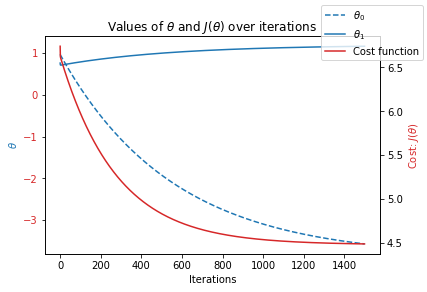

In [ ]:
fig, ax1 = plt.subplots()

#  la courbe des theta0 et theta 1 en fonction du nombre d'itteration
color='tab:blue'
ax1.plot(theta0_list, label='$\\theta_{0}$', linestyle='--', color=color)
ax1.plot(theta1_list, label='$\\theta_{1}$', linestyle='-', color=color)
ax1.set_xlabel('Iterations')
ax1.set_ylabel('$\\theta$', color=color);
ax1.tick_params(axis='y', labelcolor='tab:blue')

# la courbe du cout en fonction du nombre d'itteration
color='tab:red'
ax2 = ax1.twinx()
ax2.plot(cost_list, label='Cost function', color=color)
ax2.set_title('Values of $\\theta$ and $J(\\theta)$ over iterations')
ax2.set_ylabel('Cost: $J(\\theta)$', color=color)
ax1.tick_params(axis='y', labelcolor=color)
# ax2.legend();
fig.legend();

Traçage de la fonction du coût

Notons que $\theta^T  x$ est équivalent à $X  \theta $ où $X= \begin{pmatrix}
..(x^{(1)})^T..\\
..(x^{(2)})^T..\\
.\\
.\\
.\\
..(x^{(m)})^T..
\end{pmatrix} $

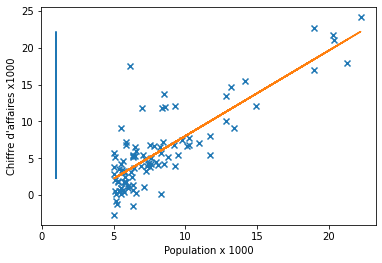

In [ ]:
y_pred = np.matmul(X,theta)
plt.scatter(X[:,1],y,marker ='x')
plt.xlabel('Population x 1000')
plt.ylabel('Chiffre d\'affaires x1000')
plt.plot(X,y_pred)
# la ligne du graphe represente le traçage de la fonction hypothèse
# la ligne devrait se rapprocher des données après entrainement avec la descente du gredient

Traçage du coût en fonction de theta0 et theta1

In [ ]:
# theta range
# we take a sample with a step of 10 
# car la taille de la matrice finale des combinaison de teta sera (1500,1500)(sans sampling) donc colab aura tendance a crash a l'affichage 3D 
theta0_vals=[]
theta1_vals=[]
for i in range(0,len(theta0_list),10): # pour chaque 10 on prend une valeur de theta0 et theta 1
    theta0_vals.append(theta0_list[i])
    theta1_vals.append(theta1_list[i])

cost_vals = np.zeros((len(theta0_vals), len(theta1_vals))) 

# calculer le cout pour chaque combinaison de theta0 et theta 1
c1=0; c2=0
for i in theta0_vals:
    for j in theta1_vals:
        t = np.zeros((2, 1))
        t[0][0] = i
        t[1][0] = j
        cost_vals[c1][c2] = computeCost(X, y, t)
        c2=c2+1
    c1=c1+1
    c2=0 

In [ ]:
import plotly.graph_objects as go
fig = go.Figure(data=[go.Surface(x=theta0_vals, y=theta1_vals, z=cost_vals)])
fig.update_layout(title='Traçage du coût en fonction de theta0 et theta1', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

Prédire des valeurs de y

In [ ]:
# Predire pour une opulation = 35,000 
predict1 = np.matmul([1, 35],theta);
predict1

array([37.04275134])

In [ ]:
# Predire pour une opulation = 70,000 
predict2 = np.matmul([1, 70],theta);
predict2

array([77.65632202])

# Régression linéaire à plusieurs variables

Proposer, l'aide des fonctions définies precedemment, une regression linéaire lorsque le nombre de descripeurs est supérieur à 1, en utilisant la base d'apprentissage suivante

In [ ]:
# # données
# dataMulti = np.genfromtxt('/content/drive/MyDrive/Cours Apprentissage Automatique et Réseaux de Neurones/TP2/dataMulti.csv', delimiter=',', dtype=float)
# dataMulti.shape

In [ ]:
# données
dataMulti = np.genfromtxt('/content/drive/MyDrive/AI/TP2/dataMulti.csv', delimiter=',', dtype=float)
dataMulti.shape

(47, 3)

Pour cette ensemble de données, nous voudrions prédire le prix d'une maison (3ème colonne de dataMulti) à partir de :
- sa supérficie (1ère colonne)
- son nombre de chambres (2ème colonne)

In [ ]:
# d'abord créer X et y
intercept = np.ones([dataMulti.shape[0],1])
X = np.column_stack((intercept,dataMulti[:,0:2]))
y = dataMulti[:,2:3]

In [ ]:
# redéfinissez vos fonctions de coût si cela est necessaire
def computeCost_multi(X, y, theta):
    theta0 = theta[0][0]
    theta1 = theta[1][0]
    theta2 = theta[2][0]
    H = theta0 + theta1 * X[:,1:2] + theta2 * X[:,2:3]
    res = (H - y)**2  
    return (np.sum(res)/(2*len(y))) 

Initialisation de $\theta_0$ , $\theta_1$ et $\theta_2$

In [ ]:
theta = np.zeros((3, 1))

Calculer le cout initial (sans normalisation)

In [ ]:
# sans normalisation
initialCost = computeCost_multi(X, y, theta)
print(initialCost)

65591585744.680855


Normalisation des données 

In [ ]:
# normalisation des features
data0_norm = (dataMulti[:,0:1] - dataMulti[:,0:1].mean())/dataMulti[:,0:1].std() # surface normalisé
data1_norm = (dataMulti[:,1:2] - dataMulti[:,1:2].mean())/dataMulti[:,1:2].std() # nbr chambres
data2_norm = (dataMulti[:,2:3] - dataMulti[:,2:3].mean())/dataMulti[:,2:3].std() # price
X_norm = np.column_stack((intercept,data0_norm,data1_norm)) 
y_norm = data2_norm # prix normalisé

Calculer le cout initial (sans normalisation)

In [ ]:
# apres normalisation
initialCost = computeCost_multi(X_norm, y_norm, theta)
print(initialCost)

0.5000000000000001


Appliquer la descente du gradient à plusieurs variables

In [ ]:
def gradientDescent_multi(X, y, theta, alpha, iterations):
   theta0 = theta[0][0]
   theta1 = theta[1][0]
   theta2 = theta[2][0]
   # init des listes
   cost_list = []
   theta0_list = []
   theta1_list = []
   theta2_list = []
   theta0_list.append(theta0)
   theta1_list.append(theta1)
   theta2_list.append(theta2)
   cost_list.append(computeCost_multi(X,y,theta))
   for i in range(iterations):
      H = theta0 + theta1 * X[:,1:2] + theta2 * X[:,2:3]
      # theta 0 
      deriv_t0 = (1/len(y)) * np.sum(H - y)
      theta0 = theta0 - alpha * deriv_t0 
      # theta 1 
      deriv_t1 = (1/len(y)) * np.sum((H - y) * X[:,1:2] )
      theta1 = theta1 - alpha * deriv_t1
      # theta 2 
      deriv_t2 = (1/len(y)) * np.sum((H - y) * X[:,2:3])
      theta2 = theta2 - alpha * deriv_t2
      #theta
      theta[0][0] = theta0
      theta[1][0] = theta1
      theta[2][0] = theta2
      #history
      theta0_list.append(theta0)
      theta1_list.append(theta1)
      theta2_list.append(theta2)
      cost_list.append(computeCost_multi(X,y,theta))
      #break
      #if np.abs((deriv_t0))< 0.001 or  np.abs((deriv_t1))< 0.001 or np.abs((deriv_t2))< 0.001 : # epsilon
       # break 
   print("last iteration:",i)
   return theta,theta0_list,theta1_list,theta2_list,cost_list

Comparer la descente du gradient avec et sans normalisation
- **Exemple**: voir la difference dans le temps de calcul

In [ ]:
# paramètres
theta = np.zeros((3, 1))
iterations = 1000;
alpha = 0.01;
# Appel
theta_overflow,theta0_listoverflow,theta1_listoverflow,theta2_listoverflow,cost_listoverflow = gradientDescent_multi(X, y, theta, alpha, iterations)
print(theta_overflow)

last iteration: 999
[[nan]
 [nan]
 [nan]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning:

overflow encountered in reduce

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning:

invalid value encountered in double_scalars



AVEC NORMALISATION

In [ ]:
# paramètres
theta = np.zeros((3, 1))
iterations = 1000;
alpha = 0.01;
# Appel
theta,theta0_list,theta1_list,theta2_list,cost_list = gradientDescent_multi(X_norm, y_norm, theta, alpha, iterations);
print(theta)

last iteration: 999
[[-1.59907548e-16]
 [ 8.79065372e-01]
 [-4.74780241e-02]]


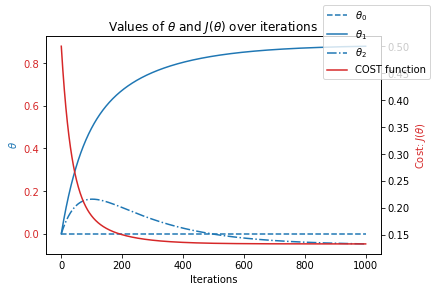

In [ ]:
fig, ax1 = plt.subplots()

# courbe theta0, 1 & 3 en fonction du nombre d'itteration
color='tab:blue'
ax1.plot(theta0_list, label='$\\theta_{0}$', linestyle='--', color=color)
ax1.plot(theta1_list, label='$\\theta_{1}$', linestyle='-', color=color)
ax1.plot(theta2_list, label='$\\theta_{2}$', linestyle='-.', color=color)

ax1.set_xlabel('Iterations'); ax1.set_ylabel('$\\theta$', color=color);
ax1.tick_params(axis='y', labelcolor=color)

# courbe du cout 
color='tab:red'
ax2 = ax1.twinx()
ax2.plot(cost_list, label='COST function', color=color)
ax2.set_title('Values of $\\theta$ and $J(\\theta)$ over iterations')
ax2.set_ylabel('Cost: $J(\\theta)$', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# ax2.legend();
fig.legend();

# Vérification de l'implementation
Comparer vos algorithmes à ceux de scikitlearn

In [ ]:
#On test avec les donnes normalisées (de la table)
predict3 = np.matmul([1,X_norm[46,1], X_norm[46,2]],theta);
print(predict3)
print(y_norm[46])

[-0.8811649]
[-0.81576951]


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
# données
LdataMulti = np.genfromtxt('/content/drive/MyDrive/AI/TP2/dataMulti.csv', delimiter=',', dtype=float)

# LdataMulti = np.genfromtxt('/content/drive/MyDrive/Cours Apprentissage Automatique et Réseaux de Neurones/TP2/dataMulti.csv', delimiter=',', dtype=float)
# LdataMulti.shape

In [ ]:
intercept = np.ones([LdataMulti.shape[0],1])
X_L = np.column_stack((intercept,LdataMulti[:,0:2]))
y_L = LdataMulti[:,2:3]

In [ ]:
linearModel = LinearRegression() 
linearModel.fit(X_norm[:, 1:3], y_norm)

LinearRegression()

In [ ]:
#sklearn (les coef theta0 et theta 1 et theta 2)
linearModel.coef_, linearModel.intercept_

(array([[ 0.88476566, -0.05317818]]), array([-1.01566224e-16]))

In [ ]:
#from scratch (les coef theta0 et theta 1 et theta 2)
theta

array([[-1.59907548e-16],
       [ 8.79065372e-01],
       [-4.74780241e-02]])

In [ ]:
y_predict = linearModel.predict(X_norm[46, 1:3].reshape(1, -1))
y_predict

array([[-0.88565963]])

In [ ]:
print('la prédiction de notre modèle multifeatures pour la colonne 46 est de '+str(predict3)+' quand a la préduction du modèle de scikitlearn est de '+str(y_predict))

la prédiction de notre modèle multifeatures pour la colonne 46 est de [-0.8811649] quand a la préduction du modèle de scikitlearn est de [[-0.88565963]]


In [ ]:
# données
data = np.genfromtxt('/content/drive/MyDrive/AI/TP2/data.csv', delimiter=',', dtype=float)
# data = LdataMulti = np.genfromtxt('/content/drive/MyDrive/Cours Apprentissage Automatique et Réseaux de Neurones/TP2/data.csv', delimiter=',', dtype=float)
data.shape

# rajoutons l'ordonnée à l'origine theta 0
intercept = np.ones((data.shape[0],1))
X=np.column_stack((intercept,data[:,0]))
y = data[:, 1]

In [ ]:
linearModel = LinearRegression() 
linearModel.fit(X[:, 1].reshape(-1, 1), y)

LinearRegression()

In [ ]:
y_predict = linearModel.predict(np.asarray([35]).reshape(1, -1))
y_predict

array([37.86039667])

In [ ]:
print('la prédiction de notre model pour le single features est de '+str(predict1)+' quand à la prédiction du model de scikitlearn elle est de '+str(y_predict))

la prédiction de notre model pour le single features est de [37.04275134] quand à la prédiction du model de scikitlearn elle est de [37.86039667]


In [ ]:
#sklearn  (les coef theta0 et theta 1)
linearModel.coef_, linearModel.intercept_

(array([1.19303364]), -3.8957808783118484)

In [ ]:
# from scratch (les coef theta0 et theta 1)
thetaTemp

array([[-3.57081935],
       [ 1.16038773]])

# Remarque :
 - les valeurs des predictions et des coef (theta 0 et theta 1) sont relativement les meme pour la Régression linéaire à plusieurs variables.
 - pour la regression a une variable  theta 1  (from scratch et sklearn) sont les memes y'a que theta 0 qui est different mais les resultats des predictions sont presque les memes .

#Historique des modification:
Samedi 26 mars: Correction du model sklearn (correction des donnée d'entrainement)

# Renforcement d'apprentissage
Mettre ici toute idée qui pourrait renforcer votre apprentissage

# Consignes

Le travail est à remettre par groupe de 4 au maximum [1..4].

Le délai est le vendredi 18 Mars 2022 à 22h


In [ ]:
# bonne chance